**Para este ejercicio, se toman datos de una encuesta que relaciona la salud mental con la música.**
https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results
Survey results on music taste and self-reported mental health

In [340]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
df = pd.read_csv('C:/Users/johan.diaz.ALPINA/OneDrive - Corporacion Universitaria Iberoamericana/Ibero/Materias/1.3 Fundamentos Ciencia de Datos/Actividad 3 - Tratamiento de datos Pandas/mxmh_survey_results.csv')

In [342]:
# df.sample(5)
df.head(3)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18,Spotify,3,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,NaN,I understand.
1,8/27/2022 19:57:31,63,Pandora,2,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,NaN,I understand.
2,8/27/2022 21:28:18,18,Spotify,4,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.


In [343]:
# Dimensione del dataframe
df.shape

(736, 33)

In [344]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [79]:
df.Age.value_counts()
# df.isna().sum()# freq = df.Age.value_counts(normalize= True) * 100
# freq

Age
18    85
19    61
17    59
21    52
16    44
      ..
80     1
50     1
68     1
46     1
89     1
Name: count, Length: 61, dtype: int64

**Descripción el problema de investigación**

Se quiere encontrar las enfermedades más comunes entre los adolescentes y jovenes según sus preferencias de genero musical.

Determinar si hay alguna correlación entre el genero musical preferido y la patología presentada

**Descripcion de la población encuestada**

Se tienen 735 datos validos de 736 en cuanto a la edad. 

La media de edad es de 25 años con una desviación de 12 años respecto a la media.
Se opta por tomar el 75% de los datos correspondiente a personas menores de 28 años.

In [80]:
pd.options.display.float_format = '{:.0f}'.format
df[['Age']].describe()

,Age
count,735
mean,25
std,12
min,10
25%,18
50%,21
75%,28
max,89


**Histograma:** distribución de las edades

Se aprecia que la mayor concentración de personas encuestadas están entre los 10 y 28 años (75%)

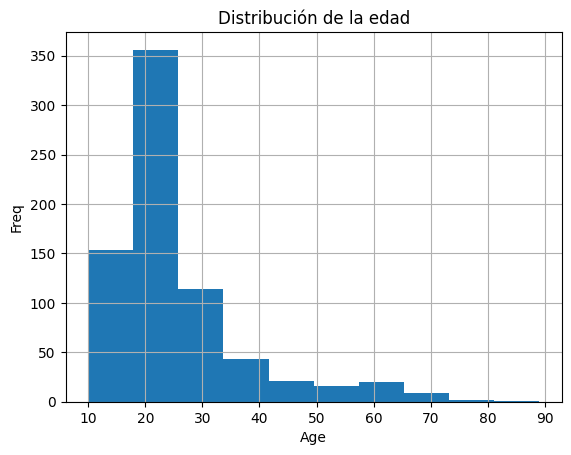

In [134]:
plt.hist(df['Age'])
plt.title('Distribución de la edad')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.grid(True)
plt.show()

In [245]:
Age_count = df_2['Age'].value_counts()
Age_count.sort_index()

Age
10     1
12     3
13     8
14    17
15    21
16    44
17    59
18    85
19    61
20    40
21    52
22    39
23    37
24    20
25    22
26    22
27    18
28    13
Name: count, dtype: int64

Se excluye entonces todas las edades mayores a 28 años para definir la base de análisis y se seleccionan adolescentes y jovenes. Edades entre 14 y 28 años.

In [350]:
df_jovenes_adolescentes = df[(df['Age'] < 29) & (df['Age'] > 13)]
df_2 = df_jovenes_adolescentes
df_2.shape

(550, 33)

Con esto tenemos unas edades con menor desviación y una distribución normal

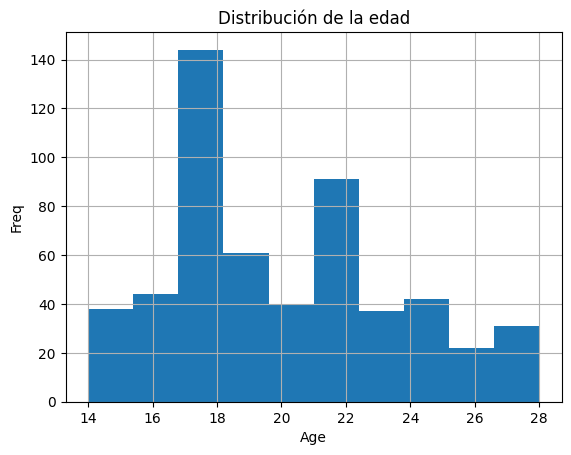

In [259]:
plt.hist(df_2['Age'])
plt.title('Distribución de la edad')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.grid(True)
plt.show()

In [260]:
df_2[['Age']].describe()

,Age
count,550
mean,20
std,3
min,14
25%,17
50%,19
75%,22
max,28


**Análisis Descriptivo de los datos**

Se quiere conocer la calificación promedio de las patologías presentadas a los encuestados. 

Se comienza por describir las variables en cuestión, donde se puede apreciar que la ansiedad es la sensación más calificada en momentos en que escuchan música con un promedio de 6/10 pts

In [261]:
df[['Anxiety', 'Depression', 'Insomnia', 'OCD']].describe()

,Anxiety,Depression,Insomnia,OCD
count,736,736,736,736
mean,6,5,4,3
std,3,3,3,3
min,0,0,0,0
25%,4,2,1,0
50%,6,5,3,2
75%,8,7,6,5
max,10,10,10,10


Con lo anterior, se agrupa la calificación promedio de cada patología por edades

In [262]:
# Filtrar el dataframe para seleccionar solo las columnas de enfermedades
df_health = df_2[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
df_health

# Agrupar por edad y calcular la media de las calificaciones por enfermedades
avg_health_age = df_health.groupby('Age').mean()
avg_health_age

,Anxiety,Depression,Insomnia,OCD
Age,,,,
14,5,4,4,2
15,7,5,4,3
16,6,5,4,3
17,6,5,3,3
18,6,4,4,3
19,6,4,3,2
20,6,5,4,2
21,6,5,3,3
22,6,6,4,3


Por medio de un gráfico de lineas se aprecia mejor el comportamiento. Donde se ve que la ansiedad es una sensación altamente calificada sobre las otras condiciones y por todas las edades. Resalta la tendencia ascendente de la depresión la cuál recibe una calificación mayor sobre los 20 años de edad

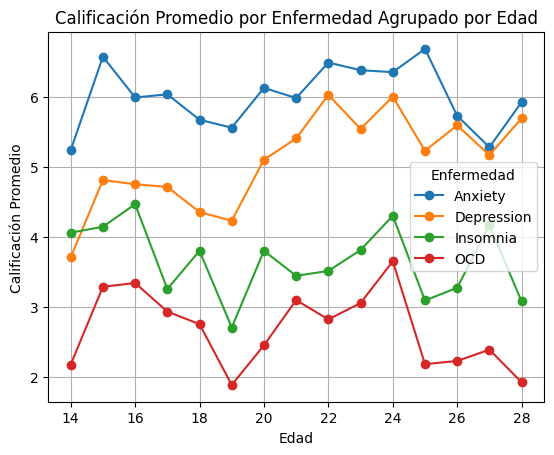

In [292]:
# Gráfico de líneas
avg_health_age.plot(kind='line', marker='o')
plt.title('Calificación Promedio por Enfermedad Agrupado por Edad')
plt.xlabel('Edad')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.legend(title='Enfermedad')

En este punto, se quiere conocer la relación de la edad con las preferencias musicales y su incidencia en la mayor o menor calificación del sentimiento transmitido.

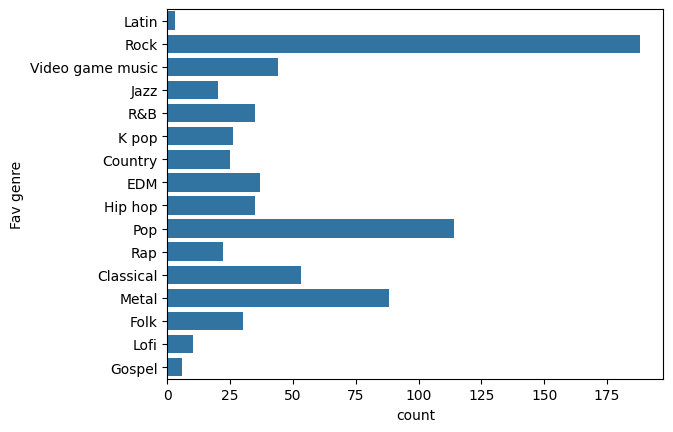

In [227]:
sns.countplot(df['Fav genre']);

In [299]:
fav_genre_countt = df_2['Fav genre'].value_counts
fav_genre_countt()

Fav genre
Rock                124
Pop                  97
Metal                64
Video game music     36
EDM                  31
Classical            31
R&B                  29
Hip hop              27
K pop                25
Folk                 20
Rap                  19
Country              18
Jazz                 16
Lofi                  9
Latin                 3
Gospel                1
Name: count, dtype: int64

Para evitar la sobre carga visual, se elige el top 4 de generos con más frecuencias y el rango de edades donde se observa un aumento importante de las calificiones dadas (edades entre 20 y 28 años)

In [339]:
# Crear la matriz con genero y edades en filas y las enfermedades en las columnas. Agregar la media de puntaje por cada combinación.
genres = ['Rock', 'Pop', 'Metal', 'Video game music', 'EDM']
ages = [20, 21, 22, 23, 24, 25, 26, 27, 28]

matriz_promedio = pd.pivot_table(df_2, 
    values=['Anxiety', 'Depression', 'Insomnia', 'OCD'],
    index=['Fav genre', 'Age'], 
    aggfunc='mean') # función de agregación 

# Filtrar solo los géneros y las edades
matriz_promedio = matriz_promedio.loc[(genres, ages), :]
        # ['Rock', 'Pop', 'Metal', 'Video game music', 'EDM', 'Classical', 'R&B', 'Hip hop', 'K pop', 'Folk',
#                                       'Rap', 'Country', 'Jazz', 'Lofi', 'Latin', 'Gospel']
matriz_promedio


Anxiety  Depression  Insomnia  OCD
Fav genre        Age                                    
Rock             20         7           6         4    1
                 21         7           7         3    3
                 22         9           7         2    4
                 23         6           5         4    2
                 24         6           7         5    2
                 25         8           5         2    3
                 26         6           6         3    2
                 27         7           7         8    5
                 28         6           5         3    2
Pop              20         6           4         4    3
                 21         6           5         4    3
                 22         6           6         4    2
                 23         5           5         3    4
                 24         6           6         3    6
                 25         7           6         4    3
                 26         7           6         3    4
                 27         7           4         3    4
Metal            20         5           4         4    3
                 21         6           5         6    2
                 22         7           5         3    5
                 23         5           5         2    1
                 24         7           6         5    5
                 25         8           6         4    2
                 26         4           4         6    3
                 27         4           3         3    1
                 28         4           8         5    2
Video game music 20         8           4         3    3
                 21         1           4         0    2
                 22         5           6         1    4
                 23         8           5         4    2
                 24         6           4         3    5
                 25         3           0         0    0
EDM              20         5           5         6    4
                 21        10          10         5    7
                 22         4           4         3    1
                 25         5           5         1    1
                 26         6           6         4    2

Se grafica en un mapa de calor.

Nuevamente se observa cómo la ansiedad obtiene las mayores pontuaciones, concentrandose principalmente en los generos del Rock, Pop y el Metal. Resalta la máxima puntuación dada a la electrónica en las edades de 21 años.

Se contrasta con el genero de Música de video juegos, la cual presenta bajas puntuaciónes en todas las edades en cuanto a depresion, insomnio y TOC.



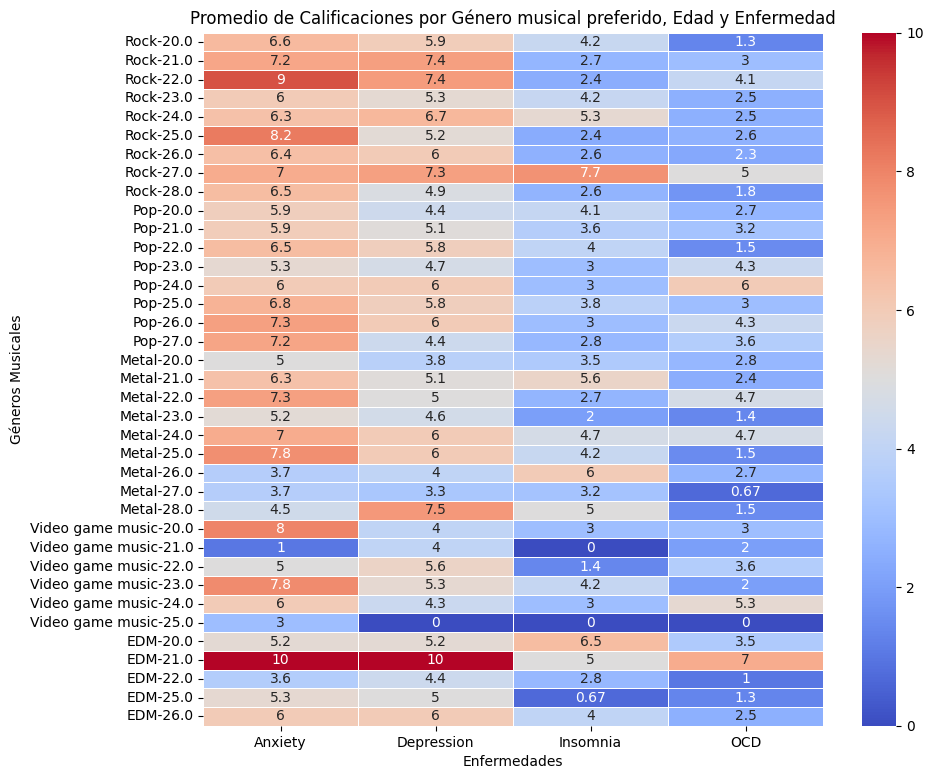

In [335]:
# Crear el heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(matriz_promedio, annot=True, cmap='coolwarm', linewidths=0.5)

# Configuración del gráfico
plt.title('Promedio de Calificaciones por Género musical preferido, Edad y Enfermedad')
plt.xlabel('Enfermedades')
plt.ylabel('Géneros Musicales')
plt.show()